# Regressão Linear Ridge, Lasso

Realizar uma análise comparativa entre a Regressão Linear, o Ridge e o Lasso na base de dados Boston Housing Dataset.

Baseado no livro: Andreas C. Muller, Sarah Guido (2016) *Introduction to Machine Learning with Python. A guide for data science 1st edition.*


In [21]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import numpy as np
import matplotlib.pyplot as plt

In [22]:
boston = load_boston()
X = boston['data']
print('Numero de atributos original:', X.shape)

Numero de atributos original: (506, 13)


O *PolynomialFeatures()* aumenta a dimensão dos dados produzindo novos atributos que são combinações lineares dos dados originais.

In [23]:
X = MinMaxScaler().fit_transform(X)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

print('PolynomialFeatures (atributos redundantes): ', X.shape)

PolynomialFeatures (atributos redundantes):  (506, 104)


In [24]:
y = boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Regressão Linear

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Regressão linear (com atributos redundantes)')
print('Acurácia na base de treinamento: {:.2f}'.format(lr.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lr.score(X_test, y_test)))

Regressão linear (com atributos redundantes)
Acurácia na base de treinamento: 0.95
Acurácia na base de teste: 0.61


## Ridge (Regressão linear com regularização L2)

Força uma redução dos valores dos coeficientes, penalizando coeficientes grandes que não contribuem significamente para a explicação da variância do modelo.
A força de regulização é dada pelo atributo *alpha*, com valor *default* igual a 1.

In [26]:
ridge = Ridge().fit(X_train, y_train)

print('Regressão ridge (alpha=1)')
print('Acurácia na base de treinamento: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(ridge.score(X_test, y_test)))

print('')

ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('Regressão ridge (alpha=10)')
print('Acurácia na base de treinamento: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(ridge10.score(X_test, y_test)))

print('')

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('Regressão ridge (alpha=0.1)')
print('Acurácia na base de treinamento: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(ridge01.score(X_test, y_test)))

Regressão ridge (alpha=1)
Acurácia na base de treinamento: 0.89
Acurácia na base de teste: 0.75

Regressão ridge (alpha=10)
Acurácia na base de treinamento: 0.79
Acurácia na base de teste: 0.64

Regressão ridge (alpha=0.1)
Acurácia na base de treinamento: 0.93
Acurácia na base de teste: 0.77


### Comparação da Regressão Linear e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método. Pode-se observar como a regularização afeta a magnitude dos coeficientes do Ridge como um todo, mas sem zerar coeficientes de uma forma geral.

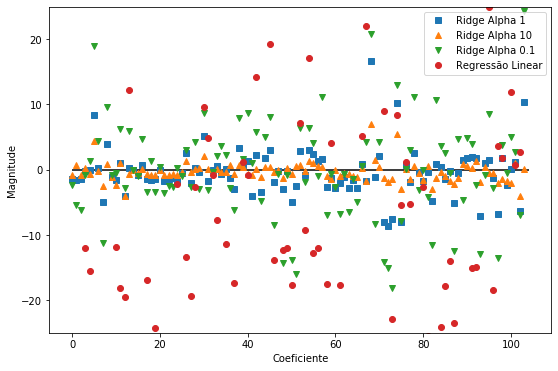

In [27]:
plt.figure(figsize=(9,6))
plt.plot(ridge.coef_, 's', label='Ridge Alpha 1')
plt.plot(ridge10.coef_, '^', label='Ridge Alpha 10')
plt.plot(ridge01.coef_, 'v', label='Ridge Alpha 0.1')
plt.plot(lr.coef_, 'o', label='Regressão Linear')
plt.xlabel('Coeficiente')
plt.ylabel('Magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()
plt.show()

## Lasso (Regressão linear com regularização L1)

Força uma redução do valor dos coeficientes, podendo zerar diversos coeficientes cujos atributos não contribuem significativamente para a previsão. Muito utilizado no apoio à tarefa de seleção de atributos (*feature selection*).

A força da regularização é dada pelo atributo *alpha*, com valor default igual a 1. *Alpha*=0 resulta na regressão linear tradicional. 

In [28]:
lasso = Lasso().fit(X_train, y_train)

print('Regressão lasso (alpha=1)')
print('Acurácia na base de treinamento: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Número de atributos usados {}'.format(np.sum(lasso.coef_ != 0)))

print('')

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print('Regressão lasso (alpha=0.001)')
print('Acurácia na base de treinamento: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Número de atributos usados {}'.format(np.sum(lasso001.coef_ != 0)))

print('')

lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print('Regressão lasso (alpha=0.0001)')
print('Acurácia na base de treinamento: {:.2f}'.format(lasso0001.score(X_train, y_train)))
print('Acurácia na base de teste: {:.2f}'.format(lasso0001.score(X_test, y_test)))
print('Número de atributos usados {}'.format(np.sum(lasso0001.coef_ != 0)))

Regressão lasso (alpha=1)
Acurácia na base de treinamento: 0.29
Acurácia na base de teste: 0.21
Número de atributos usados 4

Regressão lasso (alpha=0.001)
Acurácia na base de treinamento: 0.90
Acurácia na base de teste: 0.77
Número de atributos usados 33

Regressão lasso (alpha=0.0001)
Acurácia na base de treinamento: 0.95
Acurácia na base de teste: 0.64
Número de atributos usados 96


### Comparação Lasso e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método.

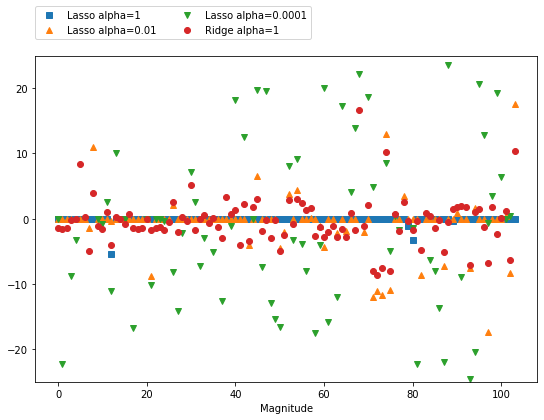

In [29]:
plt.figure(figsize=(9,6))
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso0001.coef_, 'v', label='Lasso alpha=0.0001')
plt.plot(ridge.coef_, 'o', label='Ridge alpha=1')
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('Coeficiente')
plt.xlabel('Magnitude')
plt.show()